In [ ]:
#predict classification

In [10]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [3]:
#load data
census = pd.read_csv("census_data_classification.csv")

In [4]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
census.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
census['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
#remove bad data
#check for missing data
nan_rows = census.isnull().T.any().T.sum()
#drop missing data
census = census.dropna()
census.shape

(32561, 14)

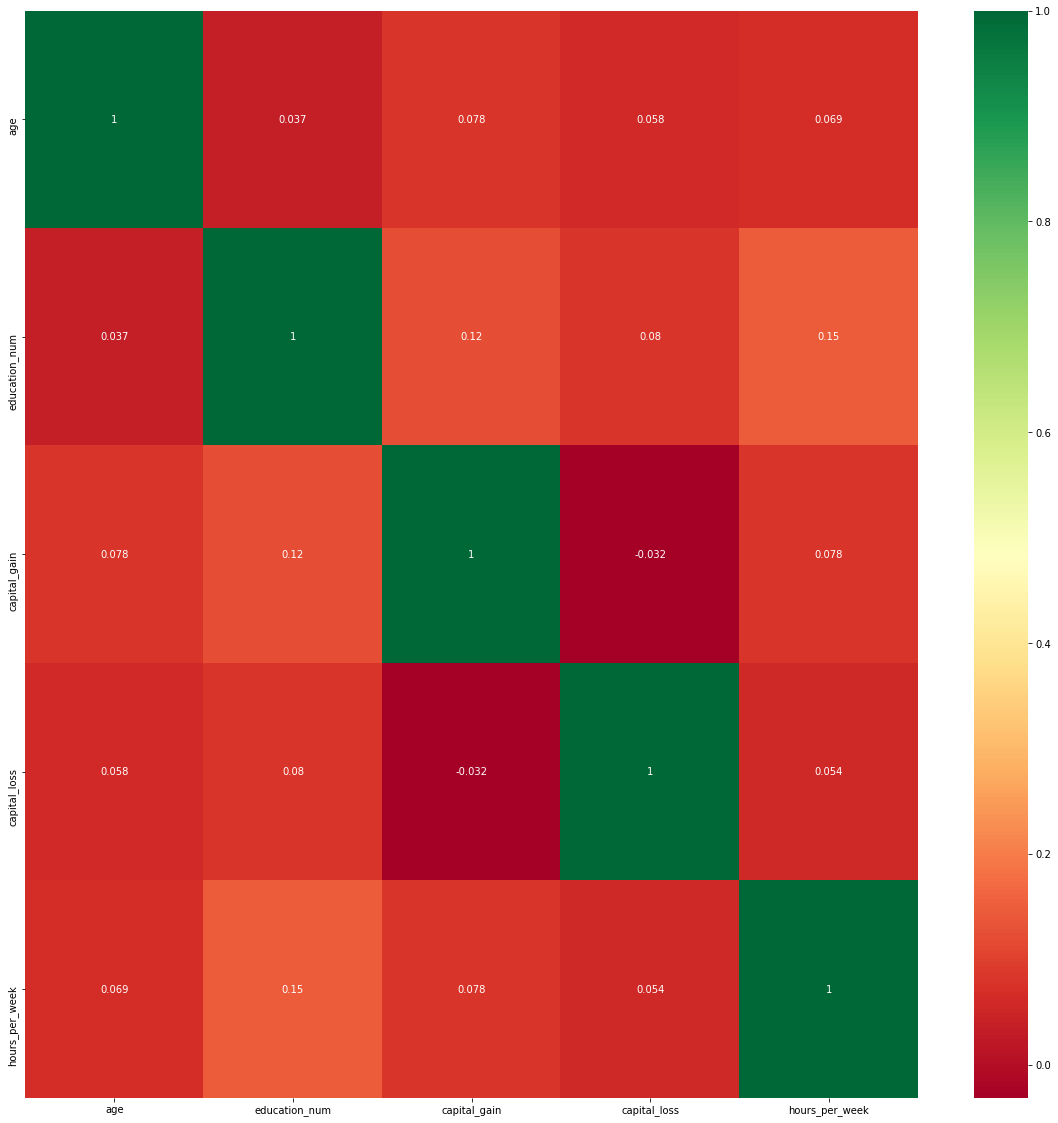

In [11]:
#correlation
x = census.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [13]:
df_cat = census[['workclass','education','marital_status','occupation',
'relationship','race','gender','native_country']]
#'workclass','education','marital_status','occupation','relationship','race','gender','native_country'
df_cat2 = pd.get_dummies(df_cat, columns=['workclass','education','marital_status','occupation',
'relationship','race','gender','native_country'], drop_first=False)
df_cat2.reset_index(drop=True, inplace=True)

In [15]:
census.head(1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [18]:
scaler = preprocessing.MinMaxScaler()
to_scale_df = census[['age','education_num','capital_gain','capital_loss','hours_per_week']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['age','education_num','capital_gain','capital_loss','hours_per_week'])
scaled_df.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
census["income_bracket"] = census["income_bracket"].astype('category')
#cleanup_nums = {"class":{">50K": 1, "<=50K": 0}}
#df.replace(cleanup_nums, inplace=True)
census["income_bracket"] = census["income_bracket"].cat.codes
census['income_bracket'].reset_index(drop=True, inplace=True)
census['income_bracket'].head()

0    0
1    0
2    0
3    0
4    0
Name: income_bracket, dtype: int8

In [ ]:
#combine data
